# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [55]:
pip install seaborn

     ---------------------------------------- 0.0/156.8 kB ? eta -:--:--
     --------- --------------------------- 41.0/156.8 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 156.8/156.8 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   ---------------------------------------- 294.6/294.6 kB 9.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   --- ------------------------------------ 0.7/7.6 MB 20.8 MB/s eta 0:00:01
   -------- ------------------------------- 1.6/7.6 MB 19.8 MB/s eta 0:00:01
   ------------ --------------------------- 2.3/7.6 MB 18.6 MB/s eta 0:00:01
   ---------------- ----------------------- 3.2/7.6 MB 18.9 MB/s eta 0:00:01
   -------------------- ------------------- 4.0/7.6 MB 18.1 MB/s eta 0:00:01
   ------------------------ --------------- 4.8/7.6 MB 19.0 MB/s eta 0:00:01
   ------------------------ --------------- 4.8/7.6 MB 19.0 MB/s eta 0:00:01
   -----

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [5]:
temp = pd.read_csv("Temp_States.csv")

#### Print `temp`

In [44]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [9]:
temp.dtypes
print("two categorical variables and a quantitative one describing the temperature for the cities in their respective states.")

two categorical variables and a quantitative one describing the temperature for the cities in their respective states.


#### Select the rows where state is New York

In [15]:
temp_new_york = temp.loc[temp["State"] == "New York"]
temp_new_york

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [17]:
ny_mean = temp_new_york["Temperature"].mean()
ny_mean

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [18]:
above_15_celcius = temp[temp["Temperature"]>15]
above_15_celcius

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [29]:
condition_1 = temp["Temperature"] > 15

cities_above_15_celcius = temp[condition_1]
cities_above_15_celcius

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [23]:
condition_1 = temp["Temperature"] > 15
condition_2 = temp["Temperature"] < 20

cities_above_15__below_20_celcius = temp[condition_1 & condition_2]
cities_above_15__below_20_celcius

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [31]:
import statistics as stats

In [42]:
temp.groupby('State')['Temperature'].mean()

State
Connecticut    15.833333
New Jersey     21.111111
New York       10.740741
Name: Temperature, dtype: float64

In [43]:
temp.groupby('State')['Temperature'].std()

State
Connecticut    1.964186
New Jersey     1.571348
New York       8.133404
Name: Temperature, dtype: float64

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [45]:
employee = pd.read_csv("employee.csv")
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [48]:
employee.dtypes
print("5 categorical columns, 2 numerical ones. Name can assume any name, department can assume names within a limited range of departments, education is limited to 3 different possible entries, gender is a binary M or F, title follows depts logic")
print("years go from a minimum of 1 to a max of 8 and salary ranges 30-70")

5 categorical columns, 2 numerical ones. Name can assume any name, department can assume names within a limited range of departments, education is limited to 3 different possible entries, gender is a binary M or F, title follows depts logic
years go from a minimum of 1 to a max of 8 and salary ranges 30-70


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

the most populated department is IT whereas Sales is the least. HR in the middle


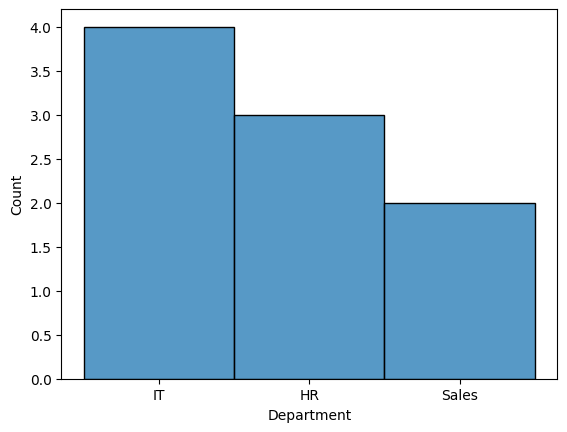

In [58]:
sns.histplot(x=employee.Department)
print("the most populated department is IT whereas Sales is the least. HR in the middle")

the population is quite small to draw juicy conclusions from. still, overall I'd consider the population to have young mandates in the company and we can see the most prevalent tenure is 1 year


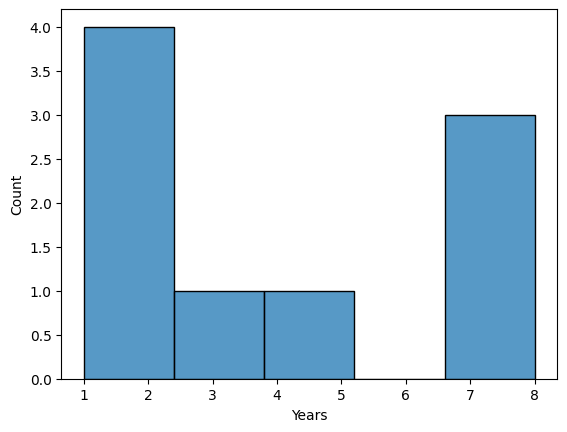

In [60]:
sns.histplot(x=employee.Salary)
print("the population is quite small to draw juicy conclusions from. still, overall I'd consider the population to have young mandates in the company and we can see the most prevalent tenure is 1 year")

big gap in the salary with the mmode being earning between 30-35 (4 observations) and then a big jump to 55-60


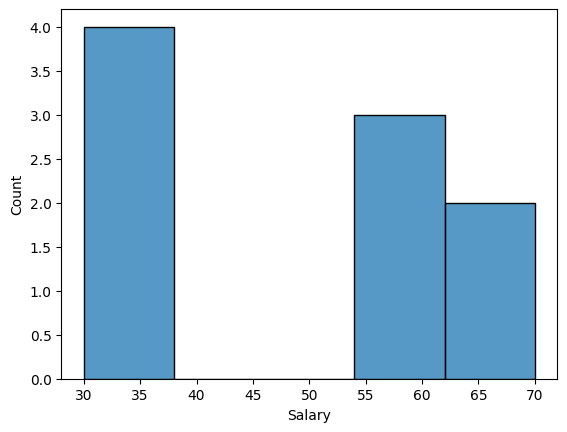

In [62]:
sns.histplot(x=employee.Salary)
print("big gap in the salary with the mmode being earning between 30-35 (4 observations) and then a big jump to 55-60")

#### What's the average salary in this company?

In [68]:
print(f"average salary is: {round(employee['Salary'].mean(),2)}")

average salary is: 48.89


#### What's the highest salary?

In [69]:
print(f"highest salary is: {round(employee['Salary'].max(),2)}")

highest salary is: 70


#### What's the lowest salary?

In [70]:
print(f"lowest salary is: {round(employee['Salary'].min(),2)}")

lowest salary is: 30


#### Who are the employees with the lowest salary?

In [75]:
#condition_1 = temp["Temperature"] > 15

#cities_above_15_celcius = temp[condition_1]
#cities_above_15_celcius


condition_min_salary = employee['Salary'] == employee['Salary'].min()
print("Maria and David earn the least:")
employee[condition_min_salary]

Maria and David earn the least:


,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [79]:
print("David is a man working as an HR-analyst with a Masters, he's been in the company for 2 years and earns 30.")
employee.loc[employee["Name"] =="David"]

David is a man working as an HR-analyst with a Masters, he's been in the company for 2 years and earns 30.


,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [81]:
employee[employee["Name"]=="David"]["Salary"].item()

30

#### Print all the rows where job title is associate

In [84]:
print(employee.loc[employee["Title"] == "associate"])
employee.loc[employee["Title"] == "associate"]

     Name Department Education Gender      Title  Years  Salary
4  Samuel      Sales    Master      M  associate      3      55
5     Eva      Sales  Bachelor      F  associate      2      55
7   Pedro         IT       Phd      M  associate      7      60


,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [85]:
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [87]:
employee.iloc[0:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [88]:
condition_associate = employee["Title"]=="associate"
condition_salary_above_55 = employee["Salary"]>55

employee[condition_associate & condition_salary_above_55]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [92]:
employee.groupby("Years")["Salary"].mean()

Years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64

####  What is the average Salary per title?

In [93]:
employee.groupby("Title")["Salary"].mean()

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

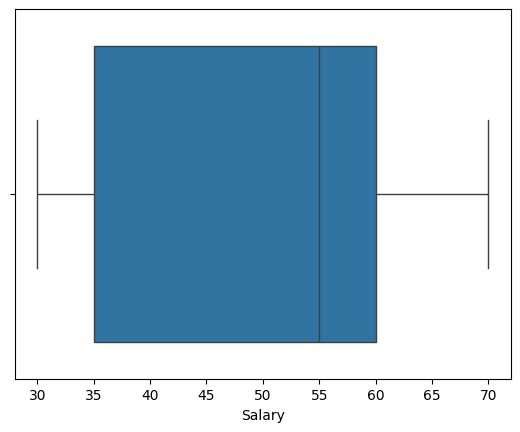

In [96]:
sns.boxplot(x="Salary", data=employee);

In [97]:
employee.Salary.quantile(0.25)

35.0

In [98]:
employee.Salary.quantile(0.75)

60.0

#### Is the mean salary per gender different?

In [100]:
print("men earn on average more than women")
employee.groupby("Gender")["Salary"].mean()

men earn on average more than women


Gender
F    47.5
M    50.0
Name: Salary, dtype: float64

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [101]:
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


In [109]:
print(f"min of salary per Dept is: {employee.groupby('Department')['Salary'].min()}")
print(f"mean of salary per Dept is: {employee.groupby('Department')['Salary'].mean()}")
print(f"max of salary per Dept is: {employee.groupby('Department')['Salary'].max()}")

print(f"min of years per Dept is: {employee.groupby('Department')['Years'].min()}")
print(f"mean of years per Dept is: {employee.groupby('Department')['Years'].mean()}")
print(f"max of years per Dept is: {employee.groupby('Department')['Years'].max()}")

min of salary per Dept is: Department
HR       30
IT       30
Sales    55
Name: Salary, dtype: int64
mean of salary per Dept is: Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64
max of salary per Dept is: Department
HR       70
IT       70
Sales    55
Name: Salary, dtype: int64
min of years per Dept is: Department
HR       2
IT       1
Sales    2
Name: Years, dtype: int64
mean of years per Dept is: Department
HR       4.666667
IT       4.500000
Sales    2.500000
Name: Years, dtype: float64
max of years per Dept is: Department
HR       8
IT       8
Sales    3
Name: Years, dtype: int64


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [122]:
#using agg
result = employee.groupby('Department')['Salary'].agg(['max','min'])
result['diff'] = result['max']-result['min']
print(result[['diff']])


#using Lambda
employee.groupby('Department')['Salary'].apply(lambda g: g.max() - g.min())

            diff
Department      
HR            40
IT            40
Sales          0


Department
HR       40
IT       40
Sales     0
Name: Salary, dtype: int64

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [184]:
orders = pd.read_csv("Orders.csv")
orders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,541904,581587,22613,2011,12,5,12,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397920,541905,581587,22899,2011,12,5,12,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397921,541906,581587,23254,2011,12,5,12,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397922,541907,581587,23255,2011,12,5,12,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [127]:
orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [128]:
print("table depicts the details for the invoiceNo's, with description of the ordered products and the details of each purchase")


table depicts the details for the invoiceNo's, with description of the ordered products and the details of each purchase


In [130]:
orders.describe

<bound method NDFrame.describe of         Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
0                0     536365    85123A  2010     12    3     8   
1                1     536365     71053  2010     12    3     8   
2                2     536365    84406B  2010     12    3     8   
3                3     536365    84029G  2010     12    3     8   
4                4     536365    84029E  2010     12    3     8   
...            ...        ...       ...   ...    ...  ...   ...   
397919      541904     581587     22613  2011     12    5    12   
397920      541905     581587     22899  2011     12    5    12   
397921      541906     581587     23254  2011     12    5    12   
397922      541907     581587     23255  2011     12    5    12   
397923      541908     581587     22138  2011     12    5    12   

                                Description  Quantity          InvoiceDate  \
0        white hanging heart t-light holder         6  2010-12-01 08:26:00   
1    

####  What is the average Purchase Price?

In [131]:
orders["amount_spent"].mean()

22.394748504739596

#### What were the highest and lowest purchase prices? 

In [133]:
print(f"highest purchase price was: {orders['amount_spent'].max()}")

highest purchase price was: 168469.6


In [137]:
print(f"lowest purchase price was: {orders['amount_spent'].min()}")

print(f"lowest purchase price above 0 was: {min(filter(lambda x: x > 0, orders['amount_spent']))}")

lowest purchase price was: 0.0
lowest purchase price above 0 was: 0.001


#### Select all the customers we have in Spain

In [147]:
customers_spain = orders.loc[orders["Country"]=="Spain"]
customers_spain.sample(3)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
254118,355773,567968,22940,2011,9,5,9,feltcraft christmas fairy,4,2011-09-23 09:44:00,4.25,12546,Spain,17.00
70323,109132,545585,POST,2011,3,5,9,postage,1,2011-03-04 09:32:00,28.00,12541,Spain,28.00
307011,420321,572886,46000M,2011,10,3,13,polyester filler pad 45x45cm,5,2011-10-26 13:46:00,1.55,12448,Spain,7.75


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [141]:
print("we have 2485 customers in Spain")
customers_spain.value_counts()

we have 2485 customers in Spain


Unnamed: 0  InvoiceNo  StockCode  year  month  day  hour  Description                      Quantity  InvoiceDate          UnitPrice  CustomerID  Country  amount_spent
6421        536944     22383      2010  12     5    12    lunch bag suki  design           70        2010-12-03 12:20:00  1.65       12557       Spain    115.50          1
347861      567340     21164      2011  9      1    15    home sweet home metal sign       6         2011-09-19 15:02:00  2.95       12540       Spain    17.70           1
347854      567340     21172      2011  9      1    15    party metal sign                 12        2011-09-19 15:02:00  1.45       12540       Spain    17.40           1
347855      567340     22176      2011  9      1    15    blue owl soft toy                12        2011-09-19 15:02:00  2.95       12540       Spain    35.40           1
347856      567340     23393      2011  9      1    15    home sweet home cushion cover    8         2011-09-19 15:02:00  3.75       12540       

#### Select all the customers who have bought more than 50 items ?

In [146]:
over_50_items = orders.loc[orders["Quantity"]>50]
over_50_items.sample(3)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
204745,291963,562534,22988,2011,8,5,14,soldiers egg cup,144,2011-08-05 14:49:00,1.06,14031,United Kingdom,152.64
200194,286339,562029,23199,2011,8,1,16,jumbo bag apples,200,2011-08-01 16:41:00,1.79,16182,United Kingdom,358.00
211679,301393,563261,84947,2011,8,1,12,antique silver tea glass engraved,72,2011-08-15 12:38:00,1.06,16836,United Kingdom,76.32


#### Select orders from Spain that are above 50 items

In [145]:
condition_spain = orders["Country"]=="Spain"
condition_above_50_items = orders["Quantity"]>50

orders[condition_spain & condition_above_50_items].sample(3)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
174449,248804,558871,84997A,2011,7,1,13,childrens cutlery polkadot green,72,2011-07-04 13:19:00,3.75,12557,Spain,270.00
289134,398631,571255,82482,2011,10,5,17,wooden picture frame white finish,72,2011-10-14 17:13:00,2.55,12454,Spain,183.60
197170,282909,561669,23296,2011,7,4,17,set of 6 tea time baking cases,128,2011-07-28 17:09:00,1.04,12507,Spain,133.12


#### Select all free orders

In [150]:
#assuming a free order is an order with amount_spent = 0
condition_free_order = orders['amount_spent']==0
orders[condition_free_order].sample(3)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
145694,209265,555200,21447,2011,6,3,12,12 ivory rose peg place settings,12,2011-06-01 12:05:00,1.25,17315,United Kingdom,0
253919,355547,567943,23409,2011,9,4,19,photo frame linen and lace large,5,2011-09-22 19:33:00,3.75,14702,United Kingdom,0
279902,386957,570256,23221,2011,10,1,9,reindeer heart decoration silver,12,2011-10-10 09:53:00,0.83,15152,United Kingdom,0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [154]:
lunch_bag = orders[orders['Description'].str.contains('lunch bag')]
lunch_bag.sample(3)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
39207,65894,541698,20727,2011,1,4,19,lunch bag black skull.,1,2011-01-20 19:16:00,1.65,14713,United Kingdom,0
207347,295186,562775,22383,2011,8,2,12,lunch bag suki design,10,2011-08-09 12:21:00,1.65,15078,United Kingdom,0
269811,374771,569403,23209,2011,10,2,9,lunch bag vintage doily,10,2011-10-04 09:02:00,1.65,13319,United Kingdom,0


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [158]:
condition_lunch_bag = orders['Description'].str.contains('lunch bag')
condition_2011 = orders['year']==2011

lunch_bags_in_2011 = orders[condition_lunch_bag&condition_2011]
lunch_bags_in_2011.sample(3)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
238879,336569,566394,23209,2011,9,1,12,lunch bag vintage doily,10,2011-09-12 12:45:00,1.65,13650,United Kingdom,0
225112,315933,564740,23209,2011,8,7,14,lunch bag vintage doily,2,2011-08-28 14:39:00,1.65,14044,United Kingdom,0
28100,45557,540268,20725,2011,1,4,11,lunch bag red retrospot,10,2011-01-06 11:25:00,1.65,13458,United Kingdom,0


#### Show the frequency distribution of the amount spent in Spain.

<Axes: xlabel='amount_spent', ylabel='Count'>

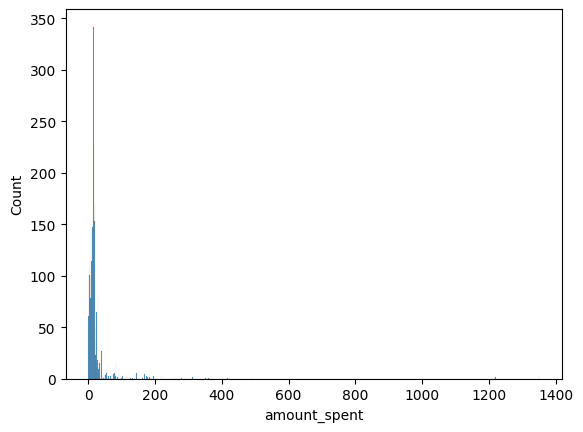

In [174]:
customers_spain.sample(3)
sns.histplot(x=customers_spain.amount_spent)

#### Select all orders made in the month of August

In [178]:
condition_august = orders['month']==8
orders_august = orders[condition_august]
orders_august.sample(3)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
215408,305503,563695,84976,2011,8,4,13,rectangular shaped mirror,6,2011-08-18 13:17:00,0.79,13617,United Kingdom,0
202523,289166,562233,21470,2011,8,3,14,flower vine raffia food cover,2,2011-08-03 14:54:00,3.75,14972,United Kingdom,0
222052,312636,564360,23155,2011,8,3,16,knickerbockerglory magnet assorted,12,2011-08-24 16:13:00,0.83,12471,Germany,0


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [181]:
orders_august.groupby("Country")["Quantity"].count()

Country
Australia            107
Austria               88
Belgium              194
Canada                 5
Channel Islands      140
Denmark               16
EIRE                 593
Finland               61
France               569
Germany              795
Iceland               22
Israel               171
Italy                 95
Malta                 55
Netherlands          280
Norway                77
Poland                17
Portugal              41
Spain                252
Sweden                40
Switzerland          267
United Kingdom     23105
Unspecified           23
Name: Quantity, dtype: int64

#### What's the  average amount of money spent by country

In [187]:
orders.groupby("Country")["amount_spent"].mean()

Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

#### What's the most expensive item?

In [189]:
orders.loc[orders['UnitPrice'].idxmax()]

Unnamed: 0                   173382
InvoiceNo                    551697
StockCode                      POST
year                           2011
month                             5
day                               2
hour                             13
Description                 postage
Quantity                          1
InvoiceDate     2011-05-03 13:46:00
UnitPrice                   8142.75
CustomerID                    16029
Country              United Kingdom
amount_spent                8142.75
Name: 118352, dtype: object

#### What was the average amount spent per year ?

In [191]:
orders.groupby("year")["amount_spent"].mean()

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64